### Importing Data & Initial Cleaning

In [1]:
from sqlalchemy import create_engine

In [2]:
engine = create_engine('sqlite:///mta_data.db')

In [3]:
engine.table_names()

/tmp/ipykernel_90/4162273999.py:1: SADeprecationWarning: The Engine.table_names() method is deprecated and will be removed in a future release.  Please refer to Inspector.get_table_names(). (deprecated since: 1.4)
  engine.table_names()


['mta5', 'mta_data']

In [4]:
import pandas as pd

In [5]:
df5 = pd.read_sql('SELECT * FROM mta5;', engine)
df5.shape

(2750356, 11)

In [6]:
df5.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/26/2021,00:00:00,REGULAR,7592792,2595706
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/26/2021,04:00:00,REGULAR,7592804,2595713
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/26/2021,08:00:00,REGULAR,7592816,2595729
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/26/2021,12:00:00,REGULAR,7592870,2595762
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/26/2021,16:00:00,REGULAR,7592992,2595791


In [7]:
import datetime

In [8]:
turnstiles_df = df5

In [9]:
turnstiles_df["DATE_TIME"] = pd.to_datetime(turnstiles_df.DATE + " " + turnstiles_df.TIME, 
                                            format="%m/%d/%Y %H:%M:%S")

In [10]:
#remove duplicates
turnstiles_df.sort_values(['C/A', 'UNIT', 'SCP', 'STATION', 'DATE_TIME'], 
                          inplace=True, ascending=False)
turnstiles_df.drop_duplicates(subset=['C/A', 'UNIT', 'SCP', 'STATION', 'DATE_TIME'], inplace=True)

In [11]:
#remove columns
turnstiles_df = turnstiles_df.drop(["EXITS", "DESC"], axis=1, errors="ignore")

In [12]:
turnstiles_test = (turnstiles_df
                        .sort_values(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"]))
turnstiles_test.head(10)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,ENTRIES,DATE_TIME
2660826,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/31/2021,00:00:00,7551789,2021-03-31 00:00:00
2660827,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/31/2021,04:00:00,7551792,2021-03-31 04:00:00
2660828,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/31/2021,08:00:00,7551805,2021-03-31 08:00:00
2660829,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/31/2021,12:00:00,7551875,2021-03-31 12:00:00
2660830,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/31/2021,16:00:00,7552015,2021-03-31 16:00:00
2660831,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/31/2021,20:00:00,7552051,2021-03-31 20:00:00
2660832,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/01/2021,00:00:00,7552051,2021-04-01 00:00:00
2660833,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/01/2021,04:00:00,7552051,2021-04-01 04:00:00
2660834,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/01/2021,08:00:00,7552051,2021-04-01 08:00:00
2660835,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/01/2021,12:00:00,7552051,2021-04-01 12:00:00


### Adding Total Entry Counts

In [13]:
turnstiles_test[["PREV_DATE_TIME", "PREV_ENTRIES"]] = (turnstiles_test
                                                       .groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE_TIME", "ENTRIES"]
                                                       .apply(lambda grp: grp.shift(1)))

/tmp/ipykernel_90/2965879844.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  turnstiles_test[["PREV_DATE_TIME", "PREV_ENTRIES"]] = (turnstiles_test


In [14]:
turnstiles_test.head(10)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,ENTRIES,DATE_TIME,PREV_DATE_TIME,PREV_ENTRIES
2660826,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/31/2021,00:00:00,7551789,2021-03-31 00:00:00,NaT,NaN
2660827,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/31/2021,04:00:00,7551792,2021-03-31 04:00:00,2021-03-31 00:00:00,7551789.0
2660828,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/31/2021,08:00:00,7551805,2021-03-31 08:00:00,2021-03-31 04:00:00,7551792.0
2660829,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/31/2021,12:00:00,7551875,2021-03-31 12:00:00,2021-03-31 08:00:00,7551805.0
2660830,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/31/2021,16:00:00,7552015,2021-03-31 16:00:00,2021-03-31 12:00:00,7551875.0
2660831,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/31/2021,20:00:00,7552051,2021-03-31 20:00:00,2021-03-31 16:00:00,7552015.0
2660832,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/01/2021,00:00:00,7552051,2021-04-01 00:00:00,2021-03-31 20:00:00,7552051.0
2660833,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/01/2021,04:00:00,7552051,2021-04-01 04:00:00,2021-04-01 00:00:00,7552051.0
2660834,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/01/2021,08:00:00,7552051,2021-04-01 08:00:00,2021-04-01 04:00:00,7552051.0
2660835,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/01/2021,12:00:00,7552051,2021-04-01 12:00:00,2021-04-01 08:00:00,7552051.0


In [15]:
turnstiles_test.dropna(subset=["PREV_DATE_TIME"], axis=0, inplace=True)

In [16]:
def get_counts(row, max_counter):
    counter = row["ENTRIES"] - row["PREV_ENTRIES"]
    if counter < 0:
        counter = -counter
    if counter > max_counter:
        # print(row["ENTRIES"], row["PREV_ENTRIES"])
        return 0
    return counter
_ = turnstiles_test.apply(get_counts, axis=1, max_counter=30000)

In [17]:
def get_counts(row, max_counter):
    counter = row["ENTRIES"] - row["PREV_ENTRIES"]
    if counter < 0:
        counter = -counter
    if counter > max_counter:
        # print(row["ENTRIES"], row["PREV_ENTRIES"])
        counter = min(row["ENTRIES"], row["PREV_ENTRIES"])
    if counter > max_counter:
        return 0
    return counter
turnstiles_test["TOTAL_ENTRIES"] = turnstiles_test.apply(get_counts, axis=1, max_counter=30000)

In [18]:
turnstiles_test.head(10)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,ENTRIES,DATE_TIME,PREV_DATE_TIME,PREV_ENTRIES,TOTAL_ENTRIES
2660827,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/31/2021,04:00:00,7551792,2021-03-31 04:00:00,2021-03-31 00:00:00,7551789.0,3.0
2660828,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/31/2021,08:00:00,7551805,2021-03-31 08:00:00,2021-03-31 04:00:00,7551792.0,13.0
2660829,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/31/2021,12:00:00,7551875,2021-03-31 12:00:00,2021-03-31 08:00:00,7551805.0,70.0
2660830,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/31/2021,16:00:00,7552015,2021-03-31 16:00:00,2021-03-31 12:00:00,7551875.0,140.0
2660831,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/31/2021,20:00:00,7552051,2021-03-31 20:00:00,2021-03-31 16:00:00,7552015.0,36.0
2660832,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/01/2021,00:00:00,7552051,2021-04-01 00:00:00,2021-03-31 20:00:00,7552051.0,0.0
2660833,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/01/2021,04:00:00,7552051,2021-04-01 04:00:00,2021-04-01 00:00:00,7552051.0,0.0
2660834,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/01/2021,08:00:00,7552051,2021-04-01 08:00:00,2021-04-01 04:00:00,7552051.0,0.0
2660835,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/01/2021,12:00:00,7552051,2021-04-01 12:00:00,2021-04-01 08:00:00,7552051.0,0.0
2660836,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/01/2021,16:00:00,7552051,2021-04-01 16:00:00,2021-04-01 12:00:00,7552051.0,0.0


### Masking by Time of Day & Aggregating Data

Now that total entries (rather than cumulative entries) has been calculated for each time block for each turnstile, I can proceed with masking the data set for 12-8pm.
I'm interested in measuring foot traffic for a food truck, so I need to filter the data down to the time of day for lunch and dinner.

In order to calculate the full count of total entries for 4/1, I initially had to include 3/31 data. 3/31 data will now also be filtered out with the data mask.

In [19]:
turnstiles_test['TIME'] = pd.to_datetime(turnstiles_test.TIME)
turnstiles_test['DATE'] = pd.to_datetime(turnstiles_test.DATE)

In [20]:
noon_8_mask = ((turnstiles_test['TIME'] >= '12:00:00') & (turnstiles_test['TIME'] <= '20:00:00') & (turnstiles_test['DATE'] >= '04/01/2021'))

In [21]:
turnstiles_12to8 = turnstiles_test[noon_8_mask]

In [22]:
turnstiles_daily = turnstiles_12to8.groupby(["C/A", "UNIT", "SCP", "STATION", "DATE"])[['TOTAL_ENTRIES']].sum().reset_index()
turnstiles_daily.head()

,C/A,UNIT,SCP,STATION,DATE,TOTAL_ENTRIES
0,A002,R051,02-00-00,59 ST,2021-04-01,0.0
1,A002,R051,02-00-00,59 ST,2021-04-02,0.0
2,A002,R051,02-00-00,59 ST,2021-04-03,0.0
3,A002,R051,02-00-00,59 ST,2021-04-04,0.0
4,A002,R051,02-00-00,59 ST,2021-04-05,391.0


In [23]:
station_daily = turnstiles_daily.groupby(["STATION", "DATE"])[['TOTAL_ENTRIES']].sum().reset_index()
station_daily.head()

,STATION,DATE,TOTAL_ENTRIES
0,1 AV,2021-04-01,5113.0
1,1 AV,2021-04-02,5060.0
2,1 AV,2021-04-03,3647.0
3,1 AV,2021-04-04,2866.0
4,1 AV,2021-04-05,4983.0


In [24]:
station_totals = station_daily.groupby('STATION').sum()\
    .sort_values('TOTAL_ENTRIES', ascending=False)\
    .reset_index()
station_totals.head(10)

,STATION,TOTAL_ENTRIES
0,34 ST-PENN STA,2230660.0
1,34 ST-HERALD SQ,2159932.0
2,86 ST,1870307.0
3,23 ST,1679849.0
4,GRD CNTRL-42 ST,1579868.0
5,125 ST,1495648.0
6,59 ST,1474803.0
7,42 ST-PORT AUTH,1403463.0
8,TIMES SQ-42 ST,1373749.0
9,FLUSHING-MAIN,1356073.0


This table represents the top 10 stations by total foot traffic from 4/1/21 to 6/30/21 during the 12-8pm timeframe.

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

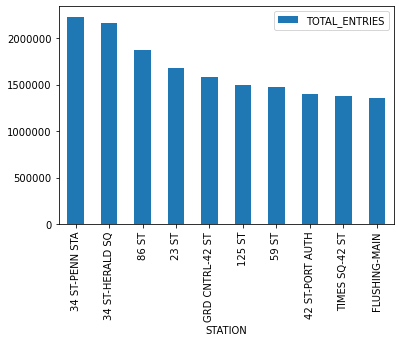

In [26]:
top_10_stations = station_totals.head(10)
top_10_stations.plot(kind='bar', x='STATION')
plt.ticklabel_format(style='plain', axis='y', useOffset=False)

In [27]:
station_daily['DAY_OF_WEEK'] = station_daily.DATE.dt.weekday

In [28]:
weekday_mask = ((station_daily['DAY_OF_WEEK'] >= 0) & (station_daily['DAY_OF_WEEK'] <= 4))

In [29]:
station_totals_weekday = station_daily[weekday_mask].groupby('STATION').sum()\
    .sort_values('TOTAL_ENTRIES', ascending=False)\
    .reset_index()

In [30]:
weekend_mask = ((station_daily['DAY_OF_WEEK'] >= 5) & (station_daily['DAY_OF_WEEK'] <= 6))

In [31]:
station_totals_weekend = station_daily[weekend_mask].groupby('STATION').sum()\
    .sort_values('TOTAL_ENTRIES', ascending=False)\
    .reset_index()

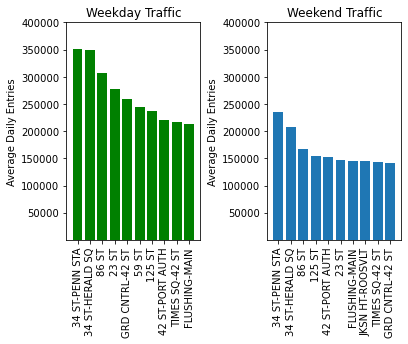

In [53]:
plt.subplot(1,2,1)
plt.bar(station_totals_weekday.STATION.head(10), station_totals_weekday.TOTAL_ENTRIES.head(10)/5, color='g')
plt.xticks(rotation='vertical')
plt.yticks([50000,100000,150000,200000,250000,300000,350000,400000])
plt.ylabel('Average Daily Entries')
plt.title('Weekday Traffic')

plt.subplot(1,2,2)
plt.bar(station_totals_weekend.STATION.head(10), station_totals_weekend.TOTAL_ENTRIES.head(10)/2)
plt.xticks(rotation='vertical')
plt.yticks([50000,100000,150000,200000,250000,300000,350000,400000])
plt.ylabel('Average Daily Entries')
plt.title('Weekend Traffic')

plt.subplots_adjust(wspace=0.5)

### Merging Precipitation Data

In [54]:
weather_data = pd.read_csv('NYC_Weather.csv')
weather_data.shape

(91, 2)

In [55]:
weather_data['DATE'] = pd.to_datetime(weather_data.DATE)

In [56]:
weather_data['PRCP'] = pd.to_numeric(weather_data.PRCP)
#PRCP = precipitation in inches

In [57]:
weather_data.dtypes

DATE    datetime64[ns]
PRCP           float64
dtype: object

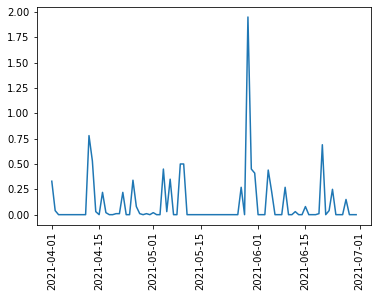

In [58]:
plt.plot(weather_data.DATE, weather_data.PRCP)
plt.xticks(rotation='vertical');

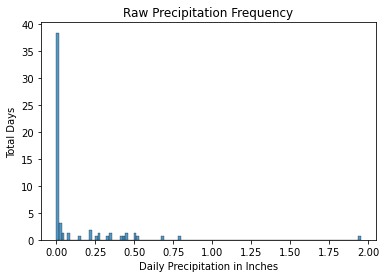

In [74]:
p1 = sns.histplot(weather_data.PRCP, stat = 'density')
p1.set_title('Raw Precipitation Frequency')
p1.set_xlabel('Daily Precipitation in Inches')
p1.set_ylabel('Total Days');

In [60]:
station_daily2 = pd.merge(station_daily, weather_data, on='DATE')
station_daily2

,STATION,DATE,TOTAL_ENTRIES,DAY_OF_WEEK,PRCP
0,1 AV,2021-04-01,5113.0,3,0.33
1,103 ST,2021-04-01,5581.0,3,0.33
2,103 ST-CORONA,2021-04-01,6095.0,3,0.33
3,104 ST,2021-04-01,1022.0,3,0.33
4,110 ST,2021-04-01,3059.0,3,0.33
...,...,...,...,...,...
34426,WOODLAWN,2021-06-30,2027.0,2,0.00
34427,WORLD TRADE CTR,2021-06-30,3310.0,2,0.00
34428,WTC-CORTLANDT,2021-06-30,1528.0,2,0.00
34429,YORK ST,2021-06-30,1696.0,2,0.00


In [61]:
def PRCP_categories(row):
    precip_value = row['PRCP']
    if precip_value == 0:
        return 'no precip'
    if precip_value > 0 and precip_value < 0.25:
        return 'low precip'
    if precip_value >= 0.25:
        return 'high precip'

In [62]:
station_daily2['PRCP_BINS'] = station_daily2.apply(PRCP_categories, axis=1)

In [63]:
station_daily2.sample(5)

,STATION,DATE,TOTAL_ENTRIES,DAY_OF_WEEK,PRCP,PRCP_BINS
5643,THIRTY THIRD ST,2021-04-15,2375.0,3,0.00,no precip
28969,FRANKLIN AV,2021-06-16,4802.0,2,0.00,no precip
21502,ROCKAWAY BLVD,2021-05-27,1306.0,3,0.27,high precip
17574,CLASSON AV,2021-05-17,1310.0,0,0.00,no precip
25282,PROSPECT PARK,2021-06-06,2381.0,6,0.00,no precip


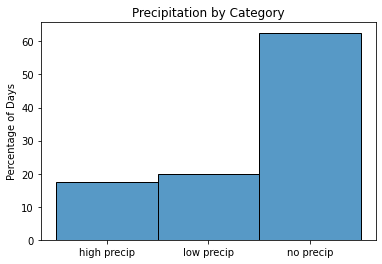

In [77]:
p2 = sns.histplot(station_daily2['PRCP_BINS'], stat = 'percent')
p2.set_title('Precipitation by Category')
p2.set(xlabel=None)
p2.set_ylabel('Percentage of Days');

In [78]:
Penn_totals = station_daily2[(station_daily2['STATION'] == '34 ST-PENN STA')]
Penn_subset = Penn_totals.groupby(['PRCP_BINS','DAY_OF_WEEK'])[['TOTAL_ENTRIES']].mean()
Penn_unstacked = Penn_subset.unstack(level=0)
Penn_unstacked

TOTAL_ENTRIES                         
PRCP_BINS     high precip low precip     no precip
DAY_OF_WEEK                                       
0            22611.333333    22741.0  26941.000000
1            23351.500000    27206.0  26717.142857
2            30691.000000    22846.0  26945.250000
3            25078.000000    23231.5  33376.875000
4            28260.000000    22705.5  27506.300000
5            18250.000000    20840.4  19133.714286
6            16296.000000    24246.0  15790.375000

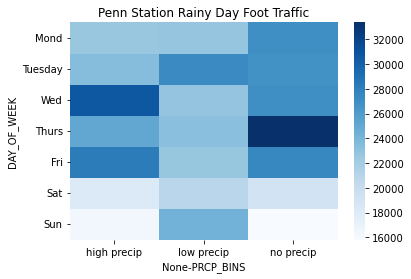

In [79]:
sns.heatmap(data=Penn_unstacked, cmap='Blues',
            xticklabels=['high precip','low precip','no precip'],
            yticklabels=['Mond','Tuesday','Wed','Thurs','Fri','Sat','Sun'])
plt.title('Penn Station Rainy Day Foot Traffic');

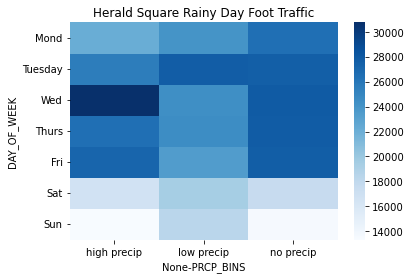

In [80]:
HSQ_totals = station_daily2[(station_daily2['STATION'] == '34 ST-HERALD SQ')]
HSQ_subset = HSQ_totals.groupby(['PRCP_BINS','DAY_OF_WEEK'])[['TOTAL_ENTRIES']].mean()
HSQ_unstacked = HSQ_subset.unstack(level=0)
sns.heatmap(data=HSQ_unstacked, cmap='Blues',
            xticklabels=['high precip','low precip','no precip'],
            yticklabels=['Mond','Tuesday','Wed','Thurs','Fri','Sat','Sun'])
plt.title('Herald Square Rainy Day Foot Traffic');

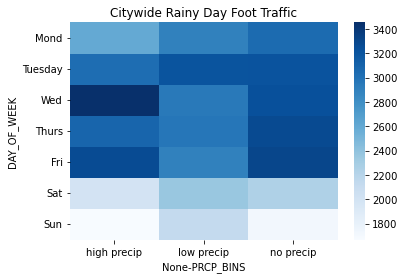

In [81]:
sd2_subset = station_daily2.groupby(['PRCP_BINS','DAY_OF_WEEK'])[['TOTAL_ENTRIES']].mean()
sd2_unstacked = sd2_subset.unstack(level=0)
sns.heatmap(data=sd2_unstacked, cmap='Blues',
            xticklabels=['high precip','low precip','no precip'],
            yticklabels=['Mond','Tuesday','Wed','Thurs','Fri','Sat','Sun'])
plt.title('Citywide Rainy Day Foot Traffic');